## Logistic Regression from Scratch

by : Pradeeshkumar U , date : 01/05/2025

Importing Required Dataset (except the Scikit learn packages)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [2]:
data = pd.read_csv('D:\Projects ML\MLfromScratch\Dataset\Diabetes.csv')

Data Analysis

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
outcome                     0
dtype: int64

Data Visualisation

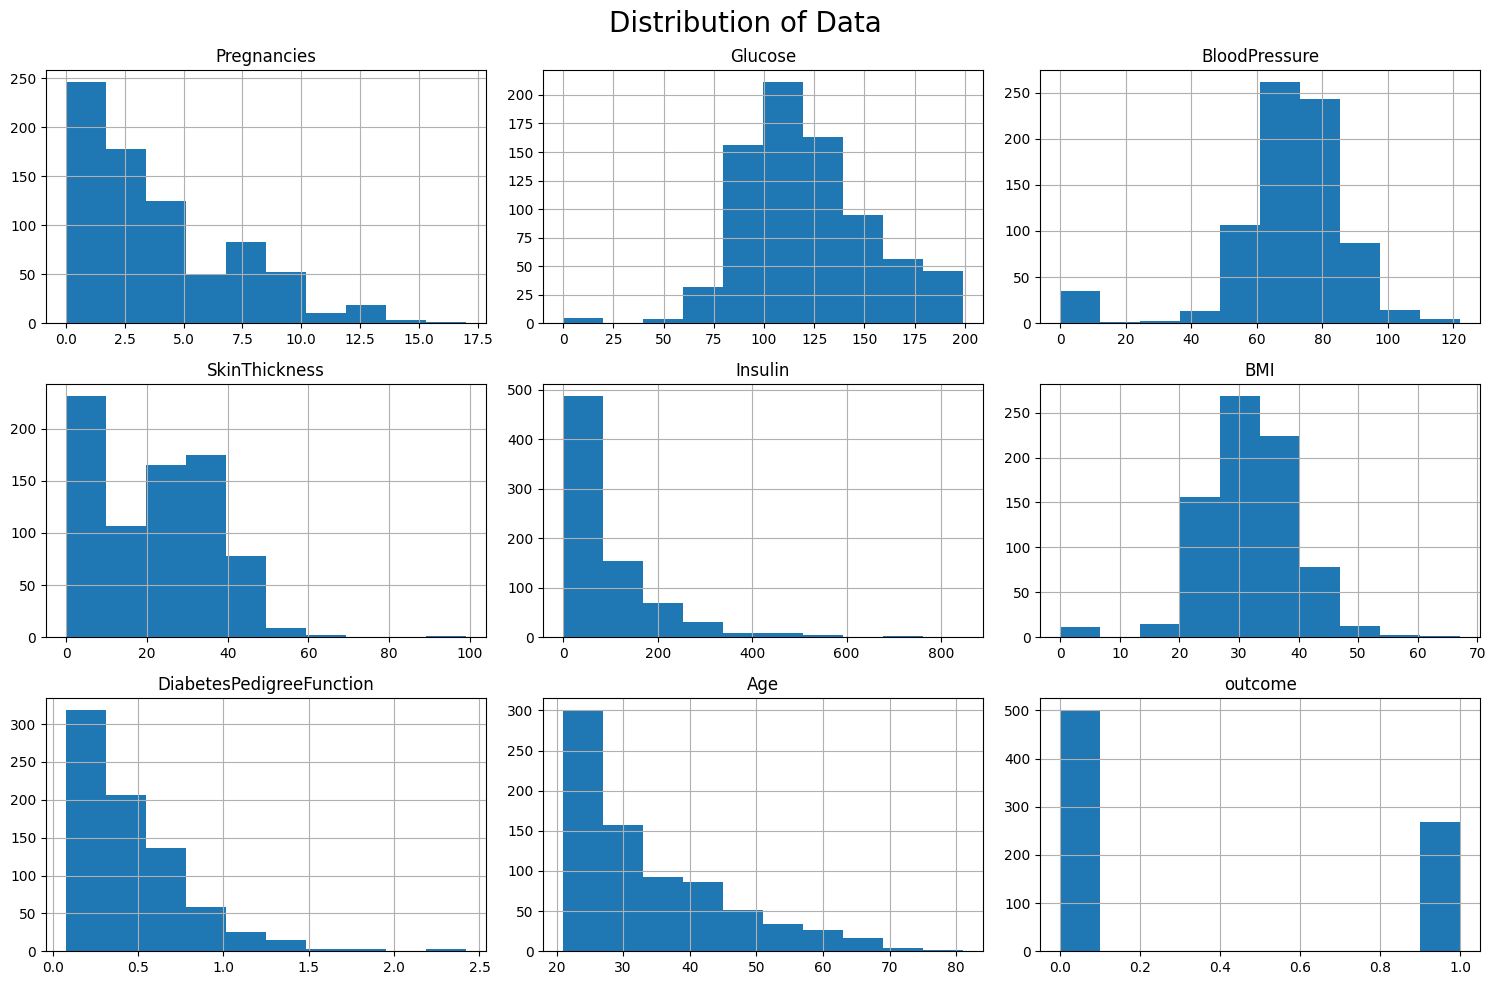

In [8]:
data.hist(figsize=(15,10))
plt.suptitle('Distribution of Data', fontsize=20)
plt.tight_layout()
plt.show()

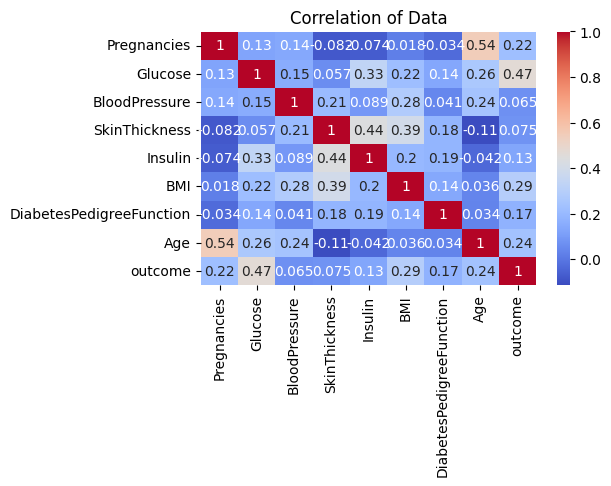

In [9]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.tight_layout()
plt.title('Correlation of Data')
plt.show()

Splitting the Data into Train and Test sets

In [10]:
def TrainTestSplit(data,test_size=0.2):
    train = data.sample(frac=1-test_size,random_state=42)
    test = data.drop(train.index)
    return train.drop(columns=['outcome']),test.drop(columns=['outcome']),train['outcome'],test['outcome']

In [11]:
Xtrain,Xtest,ytrain,ytest = TrainTestSplit(data)

Scaling the data since this process makes Gradient Descent to work faster

In [12]:
def StandardScaler(c,mean,std):
    return (c-mean)/std

In [13]:
Xtrain_scaled = StandardScaler(Xtrain,Xtrain.mean(),Xtrain.std())
Xtest_scaled = StandardScaler(Xtest,Xtrain.mean(),Xtrain.std())

Creating and Training the Logistic Regression Model

In [14]:
class LogisticRegression:
    def __init__(self,alpha=0.01,lambda_=0.01,epochs=1000):
        self.alpha = alpha
        self.lambda_ = lambda_
        self.epochs = epochs
        self.w = None
        self.b = None

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

    def fit(self,X,y):
        m,n = X.shape
        self.w = np.zeros(n)
        self.b = 0
        for _ in range(self.epochs):
            dw = np.zeros(n)
            db = 0
            for i in range(m):
                z = (np.dot(X[i],self.w)+self.b)-y[i]
                res = self.sigmoid(z)
                for j in range(n):
                    dw[j] += res*X[i][j]
                db += res
            self.w -= (self.alpha*(dw/m))+((self.lambda_*self.w)/m)
            self.b -= (self.alpha*(db/m))

    def predict(self,X):
        Z = np.dot(X,self.w)+self.b
        return np.array([1 if self.sigmoid(z)>=0.123 else 0 for z in Z])

In [15]:
model = LogisticRegression()

model.fit(Xtrain_scaled.values,ytrain.values)

ypred = model.predict(Xtest_scaled.values)
ypred_train = model.predict(Xtrain_scaled.values)

Function to get Accuracy score of the model

In [16]:
def accuracy_score(ytest,ypred):
    return np.round(np.sum(ytest==ypred)/len(ytest),2)

In [17]:
print('Accuracy Score of Training Data',accuracy_score(ytrain.values,ypred_train))

Accuracy Score of Training Data 0.73


In [18]:
print('Accuracy Score of Testing Data',accuracy_score(ytest.values,ypred))

Accuracy Score of Testing Data 0.71


Since both the Scores are almost equal and not too bad (almost 0.7) the model is slightly Underfitting and not Overfitting

The Classification report gives the Precision , Recall and F1 Score of our model and it is written to return the confusion matrix as well

In [19]:
def classification_report(ytest,ypred):
    TP,TN,FP,FN = 0,0,0,0
    for i in range(len(ytest)):
        if ytest[i] == 1 and ypred[i] == 1:
            TP += 1
        elif ytest[i] == 0 and ypred[i] == 0:
            TN += 1
        elif ytest[i] == 0 and ypred[i] == 1:
            FP += 1
        else:
            FN += 1
    print('Accuracy  : ',(TP+TN)/(TP+TN+FP+FN))
    print('Precision : ',TP/(TP+FP))
    print('Recall    : ',TP/(TP+FN))
    print('F1 Score  : ',2*(TP/(TP+FP)*TP/(TP+FN))/(TP/(TP+FP)+TP/(TP+FN)))
    return [[TP,TN],[FN,FP]]

In [20]:
conf_matrix = classification_report(ytest.values,ypred)

Accuracy  :  0.7142857142857143
Precision :  0.5875
Recall    :  0.8103448275862069
F1 Score  :  0.6811594202898551


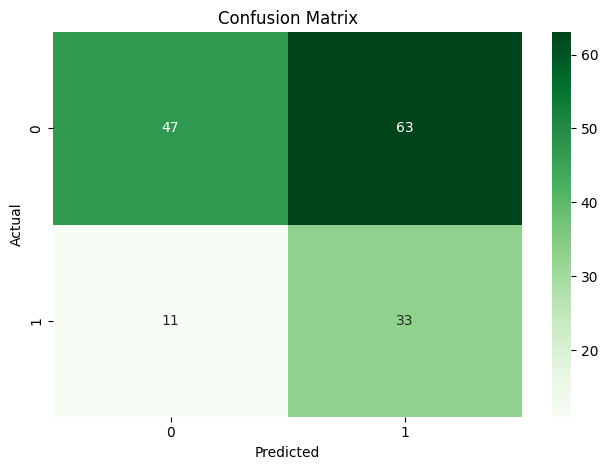

In [21]:
sns.heatmap(conf_matrix,annot=True,cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.tight_layout()
plt.ylabel('Actual')
plt.show()